In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X_data= pd.read_csv("logisticX.csv")

In [3]:
Y_data= pd.read_csv("logisticY.csv")

In [4]:
print(X_data)
print(Y_data)

    3.8915  4.2105
0   3.6898  6.6051
1   2.7763  7.5057
2   3.1137  5.7724
3   2.9251  5.4315
4   3.6699  6.4406
5   2.8404  3.8136
6   3.7729  5.2398
7   2.6465  3.4946
8   4.0902  5.9298
9   3.3337  5.5294
10  1.4400  5.8302
11  3.6919  5.0708
12  4.4506  3.6290
13  4.7716  6.4982
14  3.7306  4.8439
15  4.9867  5.6805
16  4.1954  6.4550
17  5.6164  6.0755
18  3.7672  4.6705
19  3.9820  5.2395
20  3.9381  5.2835
21  4.0603  6.4953
22  4.3357  6.7917
23  4.5707  4.4346
24  2.5098  4.4806
25  2.2003  5.6314
26  4.8419  5.4988
27  4.4708  5.7022
28  2.6502  4.4475
29  3.4506  4.1548
..     ...     ...
69  6.6949  2.7201
70  5.4368  4.1784
71  6.0597  3.2800
72  5.7150  4.0286
73  5.9220  2.9962
74  3.4284  4.0874
75  4.5904  3.8441
76  5.2147  4.0196
77  6.1363  4.6772
78  5.8662  4.3752
79  5.3976  1.9560
80  3.3328  5.3288
81  4.0697  2.2547
82  6.8436  1.7320
83  5.6380  4.4592
84  5.5175  2.7173
85  5.1615  1.6006
86  8.4153  3.4567
87  4.8131  5.3435
88  5.3576  4.3978
89  6.0388  

In [5]:
X_data=X_data.values
Y_data=Y_data.values

In [6]:
print(X_data.shape)
print(Y_data.shape)

(99, 2)
(99, 1)


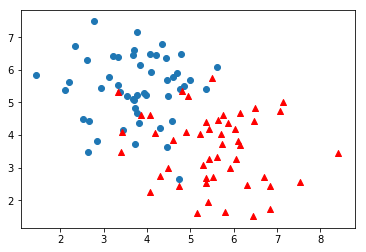

In [7]:
plt.scatter(X_data[:50,0],X_data[:50,1])
plt.scatter(X_data[50:,0],X_data[50:,1],color='r',marker='^')
plt.show()

In [8]:
ones = np.ones((99,1))
print(ones.shape)

X_data = np.hstack((ones,X_data))
print(X_data.shape)
print(X_data)

(99, 1)
(99, 3)
[[1.     3.6898 6.6051]
 [1.     2.7763 7.5057]
 [1.     3.1137 5.7724]
 [1.     2.9251 5.4315]
 [1.     3.6699 6.4406]
 [1.     2.8404 3.8136]
 [1.     3.7729 5.2398]
 [1.     2.6465 3.4946]
 [1.     4.0902 5.9298]
 [1.     3.3337 5.5294]
 [1.     1.44   5.8302]
 [1.     3.6919 5.0708]
 [1.     4.4506 3.629 ]
 [1.     4.7716 6.4982]
 [1.     3.7306 4.8439]
 [1.     4.9867 5.6805]
 [1.     4.1954 6.455 ]
 [1.     5.6164 6.0755]
 [1.     3.7672 4.6705]
 [1.     3.982  5.2395]
 [1.     3.9381 5.2835]
 [1.     4.0603 6.4953]
 [1.     4.3357 6.7917]
 [1.     4.5707 4.4346]
 [1.     2.5098 4.4806]
 [1.     2.2003 5.6314]
 [1.     4.8419 5.4988]
 [1.     4.4708 5.7022]
 [1.     2.6502 4.4475]
 [1.     3.4506 4.1548]
 [1.     5.3572 5.4207]
 [1.     2.3391 6.7416]
 [1.     3.8305 6.1357]
 [1.     2.1096 5.3812]
 [1.     3.674  5.1154]
 [1.     3.8091 4.3737]
 [1.     3.3172 6.4038]
 [1.     4.4469 6.3588]
 [1.     3.3633 5.3338]
 [1.     4.6922 5.8894]
 [1.     4.6014 5.774 ]


In [9]:
def h(x,theta):
    return 1.0/(1+np.exp(-np.dot(x,theta)))

def cost(X,Y,theta):
    
    m = X.shape[0]
    cost = 0 
    for i in range(m):
        hx = h(X[i],theta)
        cost += Y[i]*np.log(hx) + (1-Y[i])*np.log(1-hx)
        
    return cost

def grad(X,Y,theta):
    
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n,))
    
    for i in range(m):
        for j in range(n):
            hx = h(X[i],theta)
            grad[j] += (Y[i] - hx)*X[i][j]
    
    return grad/m


def gradientAscent(X,Y,learning_rate=0.1):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n,))
    costs = []
    
    for epoch in range(300):
        g = grad(X,Y,theta)
        
        for j in range(n):
            theta[j] = theta[j] + learning_rate*g[j]
        
        costs.append(cost(X,Y,theta))
            
       
    
    return theta,costs


In [10]:
theta,costs = gradientAscent(X_data,Y_data)

[ 0.02529983  1.64185471 -1.61224589]


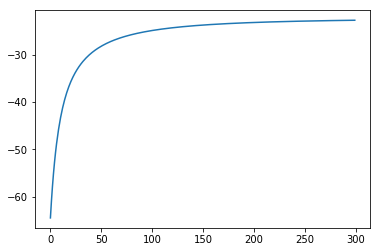

[-22.68589283]


In [11]:
print(theta)
plt.plot(costs)
plt.show()
print(costs[-1])

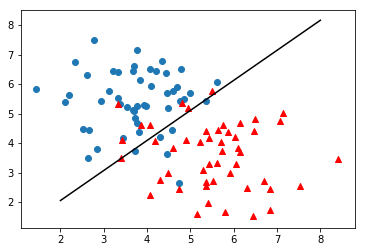

In [12]:
plt.scatter(X_data[:50,1],X_data[:50,2])
plt.scatter(X_data[50:,1],X_data[50:,2],color='r',marker='^')
x=np.linspace(2,8,10)
plt.plot(x,(-(theta[0]+theta[1]*x)/theta[2]),color='k')
plt.show()